# Loan Eligibility Prediction Model using Machine Learning Algorithms

### 1. Importing the necessary libraries and the loan_data

In [1]:
# Importing the necessary libraries
import pandas as pd # For data processing
import numpy as np # Library to perform linear algebra
import matplotlib.pyplot as plt # To create plots
%matplotlib inline
import seaborn as sns # For creating statistical graphs
from scipy.stats import chi2_contingency


In [2]:
# importing the dataset
loan_data = pd.read_csv("C:/Users/HP/Desktop/portfolio_projects/Financial/Loan_prediction_models/loan_data.csv")

In [3]:
# Viewing the first five rows
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#

### 2. Exploratory Data Analysis (EDA)

### (a) Data Cleaning

#### 2.1 Extracting the shape of the dataset

In [5]:
# Checking the shape of the dataset
loan_data.shape

(381, 13)

#### 2.2 Checking the information on each column of the dataset

In [6]:
# Checking the information about the features of the dataset 'columns'
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


Data description
1. The dataset is made up of 13 columns (features) and 381 rows (observations).
2. It is a combination of numerical variables (numbers) and categorical variables (string). Eight categories and five numerical columns.
3. 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History' are numeric.
4. 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' are categorical.

#### 2.3 Checking the number of null values in each column and duplicates

In [7]:
# Checking for the number of null values in each column
loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Checking for duplicates
loan_data.duplicated().sum()

0

1. There are five (5) columns with null values. Gender - 5, Dependents - 8, Self_Employed - 21, Loan_Amount_Term - 11, Credit_History - 30.
2. There were no duplicates rows in the dataset.

#### 2.4 Deleting the Loan_ID column because it is not needed

In [9]:
# Dropping the Loan_ID column
loan_data = loan_data.drop('Loan_ID', axis=1)

In [10]:
# Viewing if the loan_id column was dropped
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


#### 2.5 Checking for wrong values in the dataset

In [11]:
# Checking for summary statistics of the numerical columns
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


Summary statistics
1. A loan applicant with the least income earns 150,000 while the highest income an applicant earns is 9,703,000. The average amount earned by the loan applicants is 3,579,845.
2. The minimum earnings of the coapplicants is 0. This is because some applicants have no coapplicants. The highest earnings of a coapplicant is 33,837,000. The average earnings of the coapplicants is 1,277,275.
3. The least loan amount applied for is 9,000 while the highset loan amount is 150,000.
4. Loan_Amount_Term and Credit_History qualifies to be categories.

In [12]:
# Checking for number of unique values in each column of the dataset
loan_data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
# Checking for wrong values in the gender column
loan_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
# Checking for wrong values in the married column
loan_data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
# Checking for wrong values in the dependents column
loan_data['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [16]:
# Checking for wrong values in the education column
loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
# Checking for wrong values in the self_employed column
loan_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
# Checking for wrong values in the loan amount term column
loan_data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  84.,  12.,  36.])

In [19]:
# Checking for wrong values in the credit history column
loan_data['Credit_History'].unique()

array([ 1., nan,  0.])

In [20]:
# Checking for wrong values in the property area column
loan_data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [21]:
# Checking for wrong values in the loan status column
loan_data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

Some categorical variables have wrong data and null values. The Dependent variable contains wrong values '+3' and null values as well while Loan_Amount_Term has null valus and needs to be changed to a categorical column. Credit_History needs to be a category.

#### 2.6 Removing null values from the 'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', and 'Credit_History' columns

In [22]:
# Finding the mode of the gender column
loan_data['Gender'].mode()


0    Male
Name: Gender, dtype: object

In [23]:
# Filling the gender null values with the mode of the gender
loan_data['Gender'].fillna('Male', inplace = True)

# Checking if this was implemented correctly
print("Categories in 'Gender' variable:  ", end=" ")
print(loan_data['Gender'].unique())

Categories in 'Gender' variable:   ['Male' 'Female']


In [24]:
# Finding the mode of the dependents column
loan_data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [25]:
# Filling the gender null values with the mode of the dependents
loan_data['Dependents'].fillna('0', inplace = True)

In [26]:
# Correcting the wrong value in dependents column
loan_data['Dependents'].replace('3+', '3', inplace = True)

# Checking if this was implemented correctly
print("Categories in 'Dependents' variable:  ", end=" ")
print(loan_data['Dependents'].unique())

Categories in 'Dependents' variable:   ['1' '0' '2' '3']


In [27]:
# Finding the mode of the self employed column
loan_data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [28]:
# Filling the gender null values with the mode of the self employed
loan_data['Self_Employed'].fillna('No', inplace = True)

# Checking if this was implemented correctly
print("Categories in 'Self_Employed' variable:  ", end=" ")
print(loan_data['Self_Employed'].unique())

Categories in 'Self_Employed' variable:   ['No' 'Yes']


In [29]:
# Finding the mode of the loan amount term column
loan_data['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [30]:
# Filling the gender null values with the mode of the loan amount term
loan_data['Loan_Amount_Term'].fillna(360.0, inplace = True)

# Checking if this was implemented correctly
print("Categories in 'Loan_Amount_Term' variable:  ", end=" ")
print(loan_data['Loan_Amount_Term'].unique())

Categories in 'Loan_Amount_Term' variable:   [360. 120. 240. 180.  60. 300. 480.  84.  12.  36.]


In [31]:
# Converting loan amount term to integer
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype('int64')

In [32]:
loan_data['Loan_Amount_Term'].head()

0    360
1    360
2    360
3    360
4    360
Name: Loan_Amount_Term, dtype: int64

In [33]:
# Finding the mode of the credit history column
loan_data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [34]:
# Filling the gender null values with the mode of the credit history
loan_data['Credit_History'].fillna(1.0, inplace = True)

# Checking if this was implemented correctly
print("Categories in 'Credit_History' variable:  ", end=" ")
print(loan_data['Credit_History'].unique())

Categories in 'Credit_History' variable:   [1. 0.]


In [35]:
# Converting Credit History to integer
loan_data['Credit_History'] = loan_data['Credit_History'].astype('int64')

The variables with null values are filled with the most occuring values of each column.

#### 2.7 Changing 'Loan_Amount_Term' and 'Credit_History' columns to categorical because they serve as categories

In [36]:
# Converting loan amount term to object data type
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype(str)

# Viewing the unique values of the column
loan_data['Loan_Amount_Term'].unique()

array(['360', '120', '240', '180', '60', '300', '480', '84', '12', '36'],
      dtype=object)

In [37]:
# Converting credit history to object data type
loan_data['Credit_History'] = loan_data['Credit_History'].astype(str)

# Viewing the unique values of the column
loan_data['Credit_History'].unique()

array(['1', '0'], dtype=object)

#### 2.8 Replacing the values of 'Credit_History' and 'Loan_Status' for easy understanding

In [38]:
# Replacing the values in credit history column
loan_data['Credit_History'].replace('1', 'Good loan history', inplace = True)

loan_data['Credit_History'].replace('0', 'Bad loan history', inplace = True)

In [39]:
# Replacing the values in Loan status column
loan_data['Loan_Status'].replace('Y', 'Granted', inplace = True)

loan_data['Loan_Status'].replace('N', 'Declined', inplace = True)

The categories with codes or labels are replaced with more descriptive words. 
1. Credit_History of 1 is changed to 'Has loan history' while 0 is change to No loan history.
2. Loan_Status of Y is changed to Granted while N changed to Declined.

In [40]:
# Checking the number of numerical and categorical columns

# Defining the numerical and categorical features in the loan_data dataset
numerical_features = [feature for feature in loan_data.columns if loan_data[feature].dtype != 'O']
cate_features = [feature for feature in loan_data.columns if loan_data[feature].dtype == 'O']

# Printing the result
print('There are {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('There are {} categorical features : {}'.format(len(cate_features), cate_features))

There are 3 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
There are 9 categorical features : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [41]:
# Checking for the number of null values in each column
loan_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After the data clening process, there were no null values.

### (b) Insight Extraction

#### 2.9 Viewing the cleaned dataset

In [42]:
# Changing the display settings to show first 100 rows
pd.set_option('display.max_rows', 100)

# Viewing the loan_data
loan_data.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,Good loan history,Rural,Declined
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,Good loan history,Urban,Granted
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,Good loan history,Urban,Granted
3,Male,No,0,Graduate,No,6000,0.0,141,360,Good loan history,Urban,Granted
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,Good loan history,Urban,Granted
5,Male,Yes,2,Graduate,No,3200,700.0,70,360,Good loan history,Urban,Granted
6,Male,Yes,2,Graduate,No,2500,1840.0,109,360,Good loan history,Urban,Granted
7,Male,No,0,Graduate,No,1853,2840.0,114,360,Good loan history,Rural,Declined
8,Male,Yes,2,Graduate,No,1299,1086.0,17,120,Good loan history,Urban,Granted
9,Male,No,0,Graduate,No,4950,0.0,125,360,Good loan history,Urban,Granted


#

#### 2.10.1 Using a Heatmap to check the correlation between the numerical variables

C:\Users\HP\AppData\Local\Temp\ipykernel_4644\2157999339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = loan_data.corr().round(2)


Text(0.5, 1.0, 'The correlation between the numerical features')

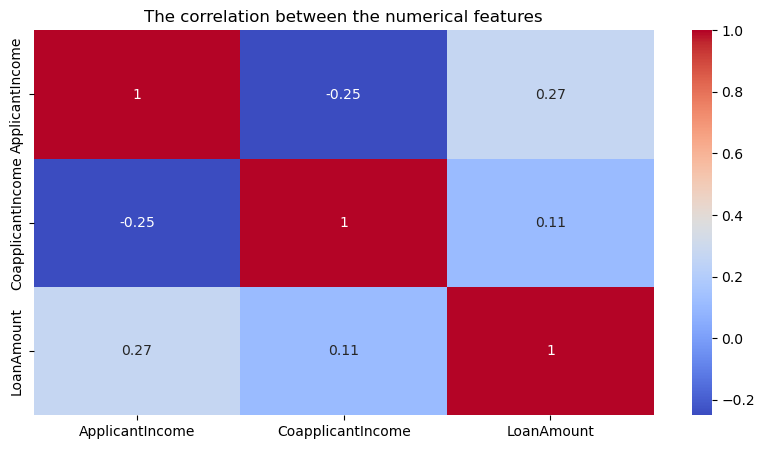

In [43]:
# Checking the correlation between the numerical variables
df_cor = loan_data.corr().round(2)
plt.figure(figsize = (10, 5))
plot = sns.heatmap(df_cor, annot=True, cmap='coolwarm')
plt.title('The correlation between the numerical features')

1. There is a weak negative correlation of -0.25 between CoapplicantIncome and ApplicantIncome. An applicant who does not earn much money may need a coapplicant with much money to apply for a loan.
2. The weak positive correlation of 0.27 between ApplicantIncome and Loan amount shows that an applicant who earns more is likely applying for a higher loan amount.
3. The relationship between CoapplicantIncome and LoanAmount is a very weak positive correlation of 0.11 which means that getting a higher loan amount may need a coapplicant who earns more.

Text(0.5, 1.0, 'A pairplot of correlating features')

<Figure size 2000x2000 with 0 Axes>

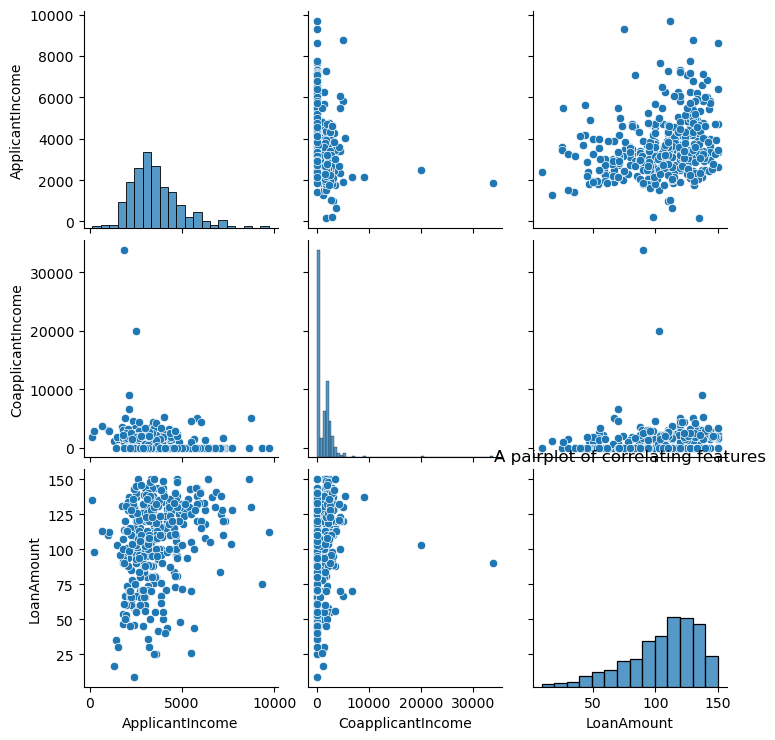

In [44]:
# Visualising the pair plots of the correlation
plt.figure(figsize = (20,20))
sns.pairplot(loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('A pairplot of correlating features')

In [45]:
# Selecting the categorical columns
categorical_features = loan_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)

In [46]:
categorical_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,360,Good loan history,Rural,Declined
1,Male,Yes,0,Graduate,Yes,360,Good loan history,Urban,Granted
2,Male,Yes,0,Not Graduate,No,360,Good loan history,Urban,Granted
3,Male,No,0,Graduate,No,360,Good loan history,Urban,Granted
4,Male,Yes,0,Not Graduate,No,360,Good loan history,Urban,Granted


#### 2.11 The summary statistics of the numerical columns 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'

Histogram for column ApplicantIncome


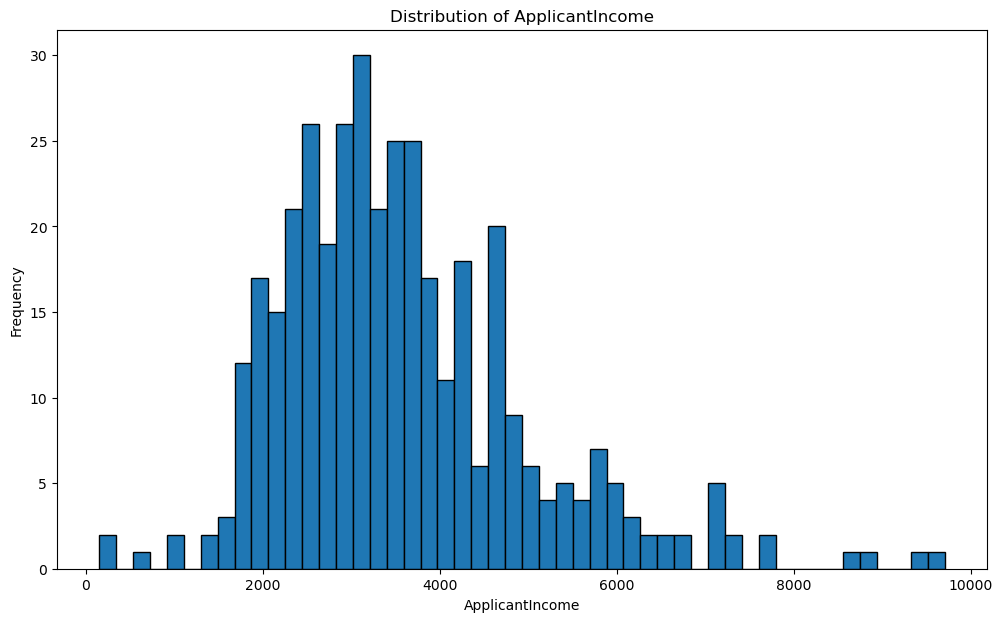

Histogram for column CoapplicantIncome


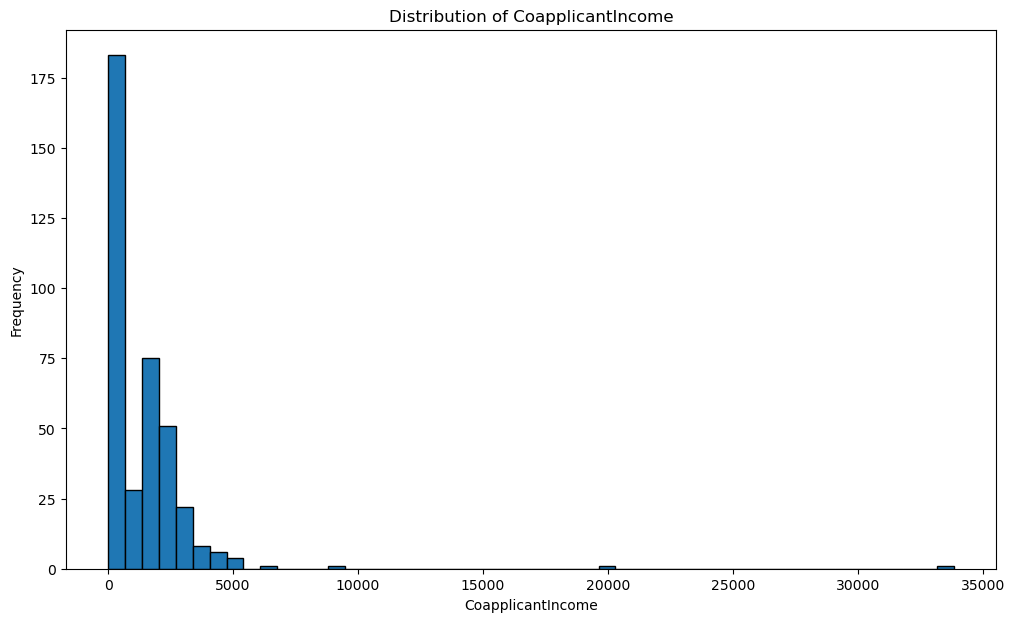

Histogram for column LoanAmount


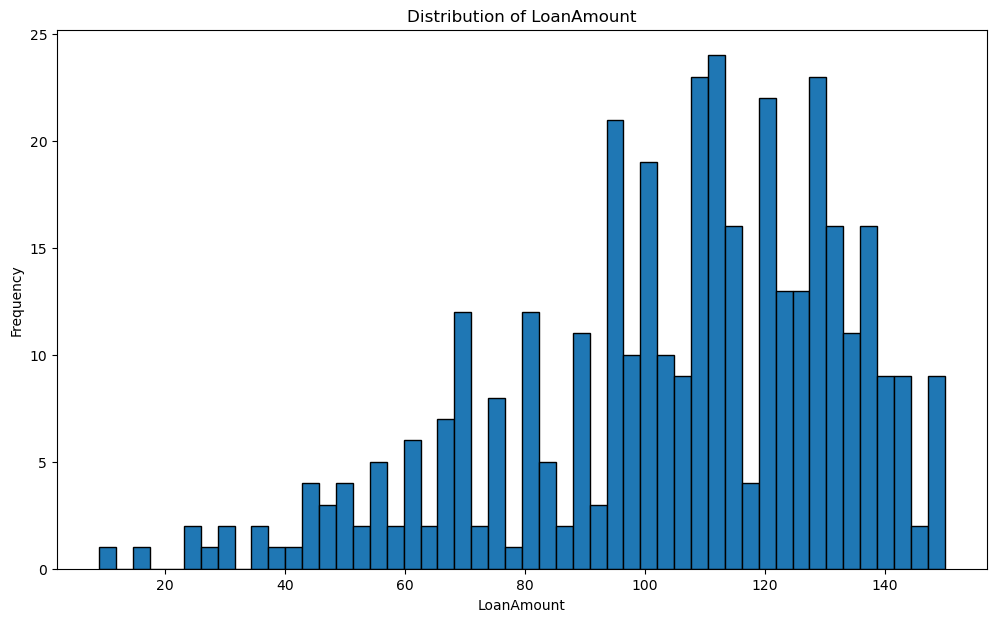

In [47]:
for columns in numerical_features:
    print('Histogram for column', columns)
    plt.figure(figsize=(12, 7))
    plt.hist(loan_data[columns], bins=50, edgecolor='black')
    plt.title(f"Distribution of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

#### Applicant Income
1. The applicant income histogram is skewed to the right which means it is likely that more applicants will earn higher that than the income captured in the data.
2. The outliers that exist are normal because these are earnings of applicants.
3. Most applicants earn approximately 3,000,000.
4. The average earnings of applicants is 3,579,850
5. The minimum and maximum earnings of applicants are 150,000 and 9,703,000 respectively.

#### Coapplicant Income
1. The coapplicant income histogram is skewed to the right which means that more values are likely to occur.
2. The outliers are normal because they are earnings.
3. Most coapplicants record 0 amount because most aoolicants applied without coapplicants.
4. The minimum and maximum earings of coapplicants are 0 and 33,837,000 respectively.
5. And the average income of coapplicants is 1,277,275.

#### Loan Amount
1. The loan amount histogram is skewed to the left which means that the bank is likely not giving loans above 150,000.
2. The outliers here are normal because they are loan amounts that an applicant can afford to take.
3. The histogram is multi modal because it has many peaks at approximately 25,000.00, 55,000.00, 65,000.00, 80,000.00, 95,000.00, 110,000.00, and 130,000.00.
4. The minimum and maximum loan amount are 9,000 and 150,000.
5. The most loan amount applied for is approximately 130,000.
6. The average loan amount is 104,987.

#### 2.12 Summary statistics of the categorical variables

Unique values in column Gender
Male      296
Female     85
Name: Gender, dtype: int64


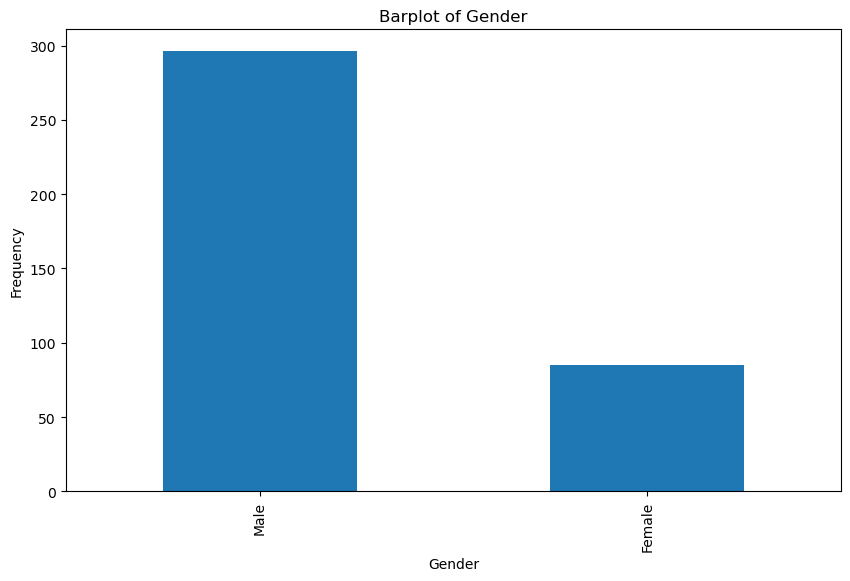

Unique values in column Married
Yes    228
No     153
Name: Married, dtype: int64


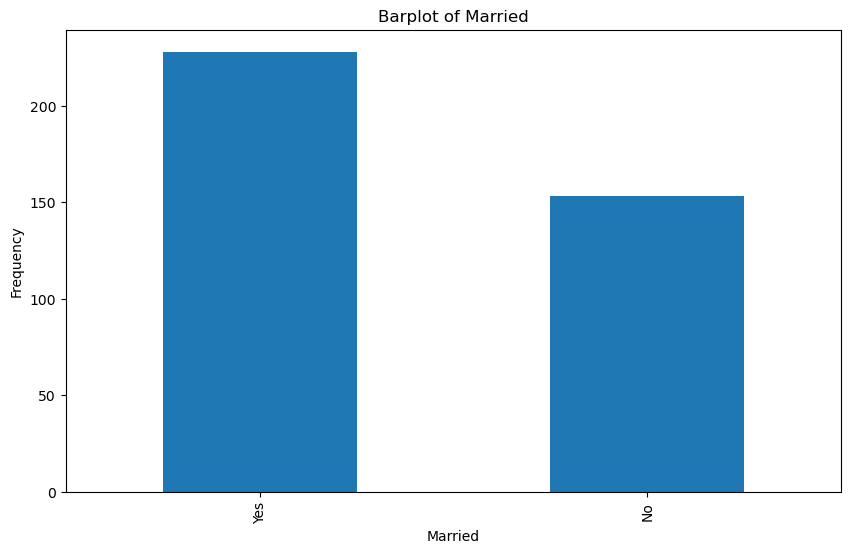

Unique values in column Dependents
0    242
2     59
1     52
3     28
Name: Dependents, dtype: int64


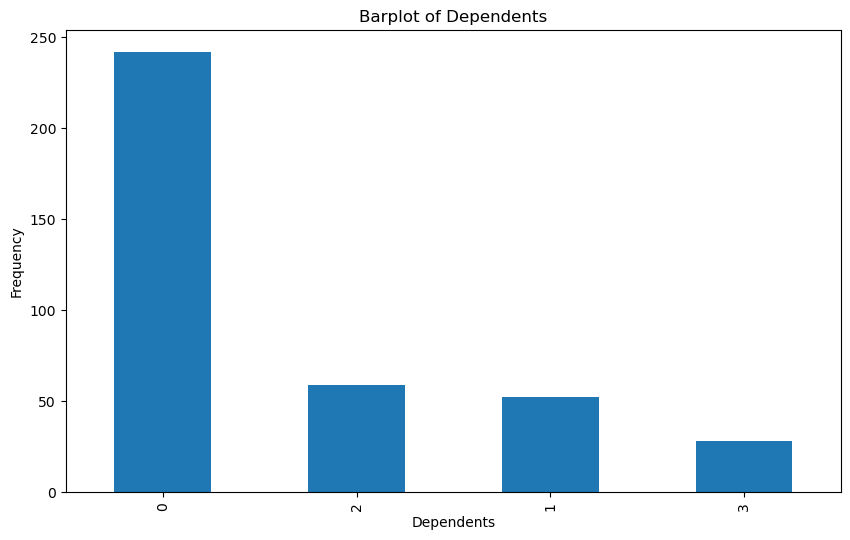

Unique values in column Education
Graduate        278
Not Graduate    103
Name: Education, dtype: int64


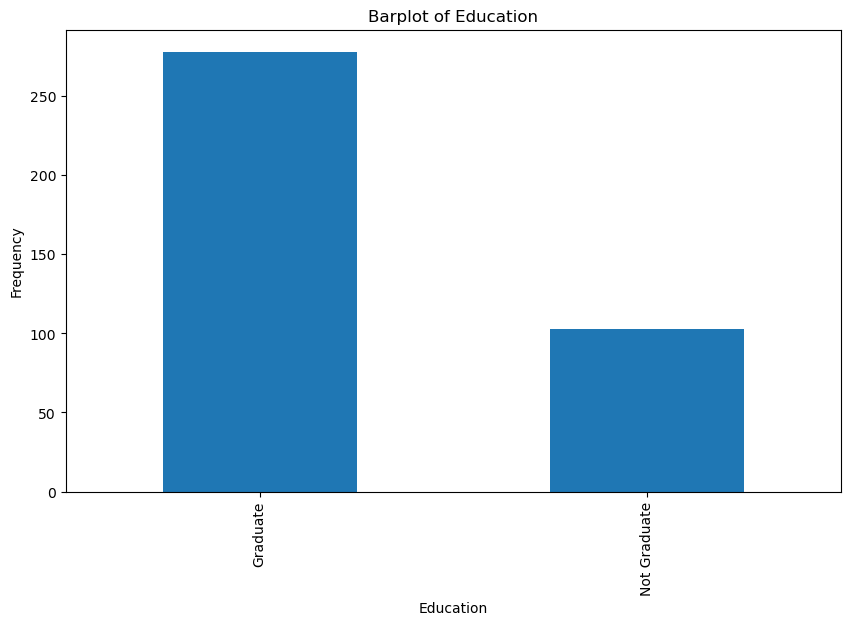

Unique values in column Self_Employed
No     346
Yes     35
Name: Self_Employed, dtype: int64


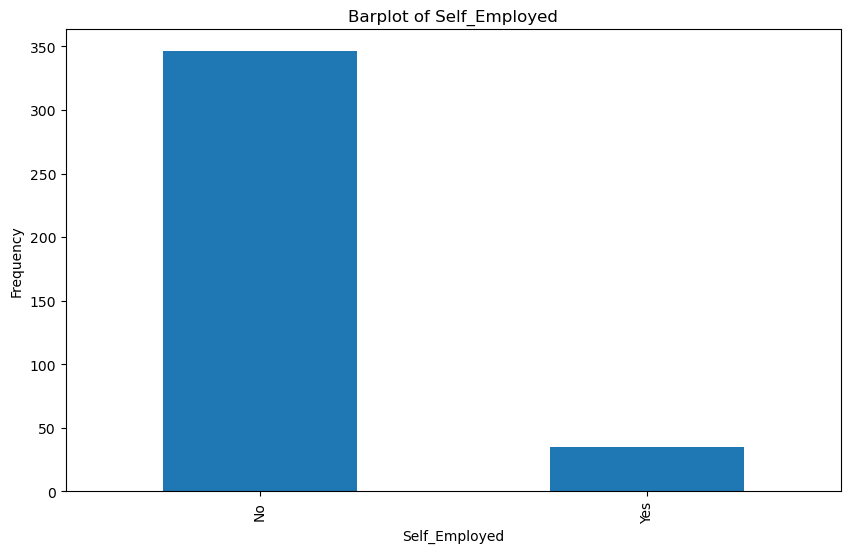

Unique values in column Loan_Amount_Term
360    323
180     29
480     11
300      7
120      3
84       3
240      2
60       1
12       1
36       1
Name: Loan_Amount_Term, dtype: int64


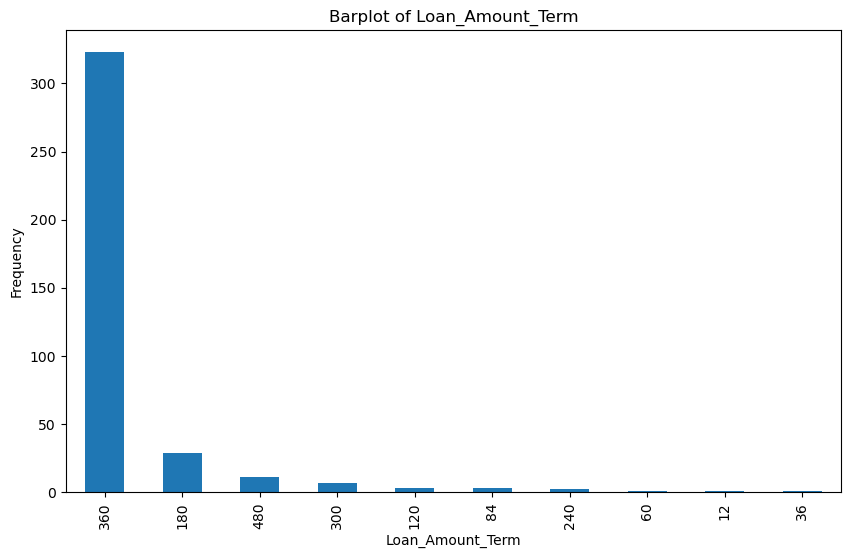

Unique values in column Credit_History
Good loan history    324
Bad loan history      57
Name: Credit_History, dtype: int64


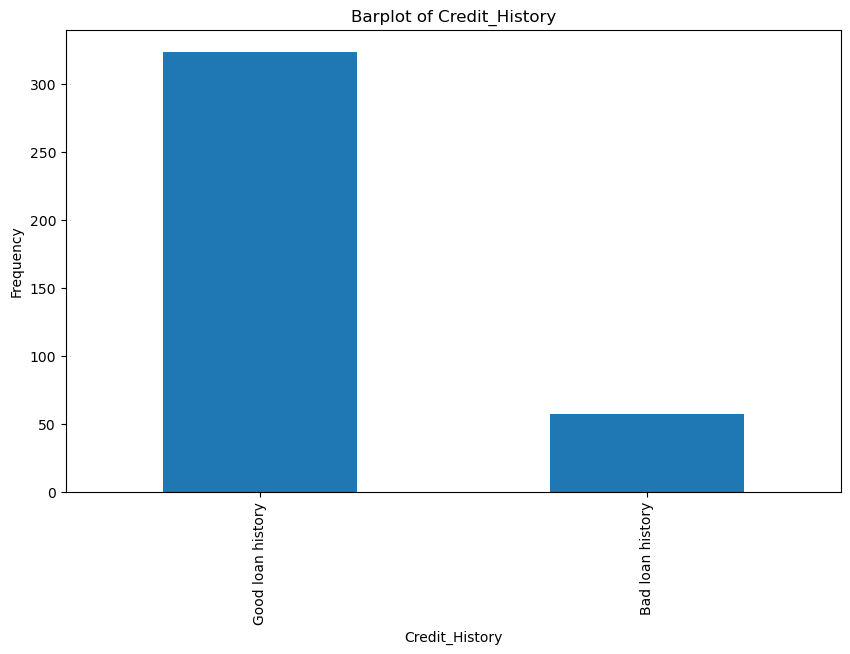

Unique values in column Property_Area
Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64


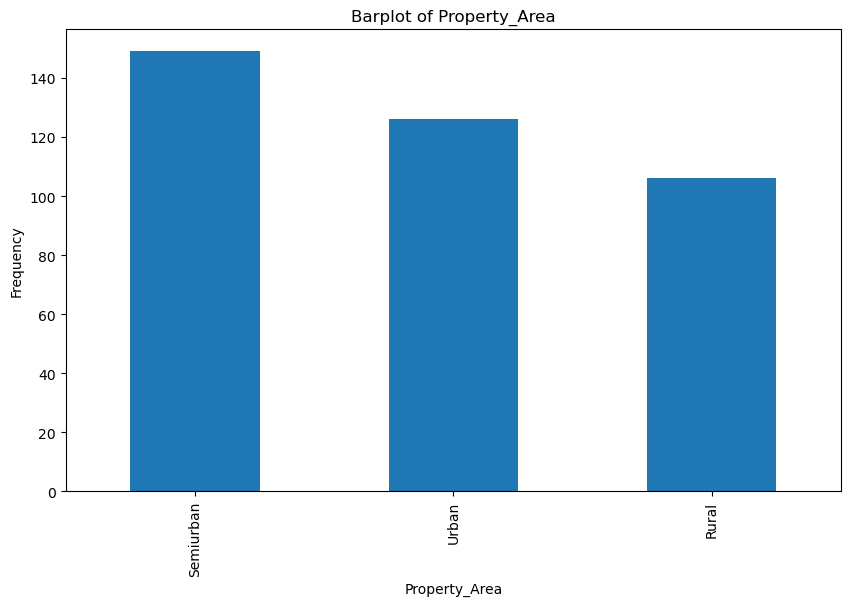

Unique values in column Loan_Status
Granted     271
Declined    110
Name: Loan_Status, dtype: int64


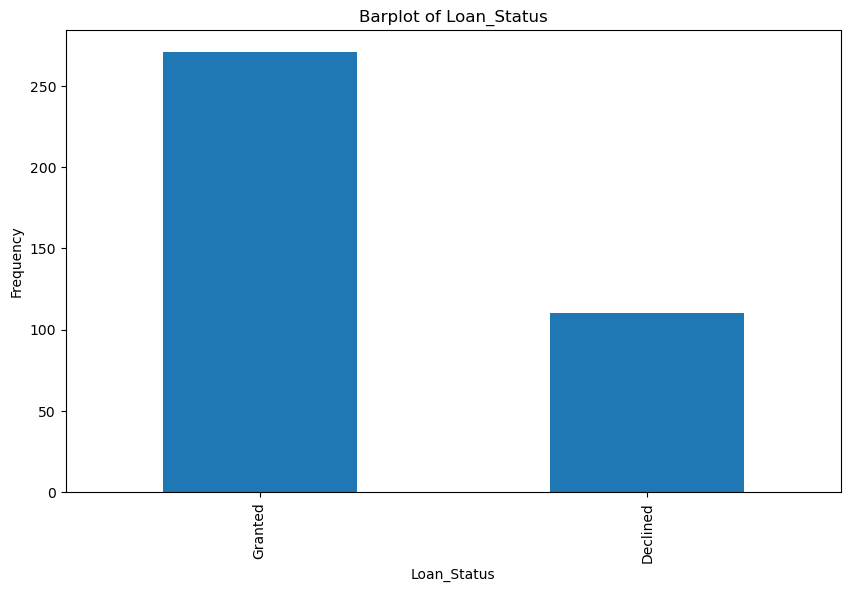

In [48]:
for columns in cate_features:
    print("Unique values in column", columns)
    print(loan_data[columns].value_counts())
    plt.figure(figsize=(10, 6))
    loan_data[columns].value_counts().plot(kind='bar')
    plt.title(f"Barplot of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

In [49]:
# The number of applications granted and declined grouped by gender
loan_status_by_gender = loan_data.groupby(['Gender', 'Loan_Status'])['Loan_Status'].count()
loan_status_by_gender

Gender  Loan_Status
Female  Declined        26
        Granted         59
Male    Declined        84
        Granted        212
Name: Loan_Status, dtype: int64

In [50]:
# The percentage of applications granted and declined grouped by gender
loan_status_by_gender_percentage = loan_status_by_gender / sum(loan_status_by_gender) * 100
loan_status_by_gender_percentage.round(2)

Gender  Loan_Status
Female  Declined        6.82
        Granted        15.49
Male    Declined       22.05
        Granted        55.64
Name: Loan_Status, dtype: float64

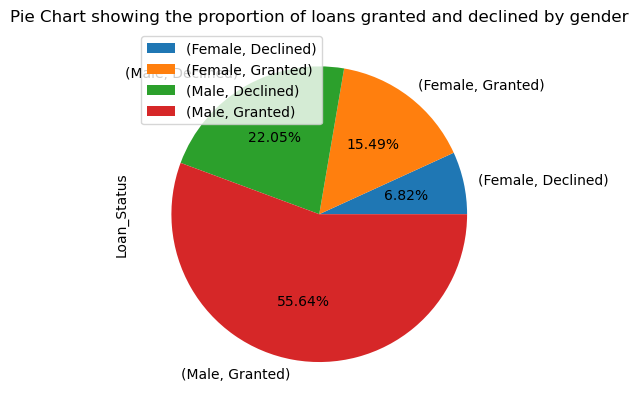

In [51]:
# Visualizing the percentage proportion of loans granted and declined grouped by gender
loan_status_by_gender_percentage.plot(kind='pie', autopct='%1.2f%%')
plt.xticks(rotation=360)
plt.title("Pie Chart showing the proportion of loans granted and declined by gender")
plt.legend()


# Displaying the plot
plt.show()

#

### 3. Preparing the dataset for model building

In [52]:
# Extracting the input and output data from the dataset
X = loan_data.drop('Loan_Status', axis=1) # Input
y = loan_data['Loan_Status'] # Output

In [53]:
y.head()

0    Declined
1     Granted
2     Granted
3     Granted
4     Granted
Name: Loan_Status, dtype: object

In [54]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,Good loan history,Rural
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,Good loan history,Urban
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,Good loan history,Urban
3,Male,No,0,Graduate,No,6000,0.0,141,360,Good loan history,Urban
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,Good loan history,Urban


In [55]:
# Applying Label Encoder to the output
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [56]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [57]:
#Numeric columns of the independent variables
num_columns = [feature for feature in X.columns if X[feature].dtype != 'O']

# categorical variables of the independent variables
cat_columns = [feature for feature in X.columns if X[feature].dtype == 'O']

#

In [58]:
# Importing the necessary sklearn package
from sklearn.preprocessing import OrdinalEncoder

# Creating the ordinal encoder
ordicoder = OrdinalEncoder()

# Transforming the object data of the dataframe
X[['Education']] = ordicoder.fit_transform(X[['Education']])
X[['Loan_Amount_Term']] = ordicoder.fit_transform(X[['Loan_Amount_Term']])
X[['Property_Area']] = ordicoder.fit_transform(X[['Property_Area']])

# Using MinMaxScaler to normalize columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Using MinMaxScaler on the transformed ordinal columns
X[['Education']] =scaler.fit_transform(X[['Education']])
X[['Loan_Amount_Term']] =scaler.fit_transform(X[['Loan_Amount_Term']])
X[['Property_Area']] =scaler.fit_transform(X[['Property_Area']])

Applying ordinal encoder to the ordinal categorical columns of the dataset and scaling the values for better model performance.

#

In [59]:
# Importing the necessary sklearn package to encode nominal data
from sklearn.preprocessing import OneHotEncoder

# Creating the encoder
nomcoder = OneHotEncoder(sparse = False)

# Transformini the marital-status column
#adult_df_2['marital-status'] = nomcoder.fit_transform(adult_df_2['marital-status'].values.reshape(-1,1))
X['Gender'] = nomcoder.fit_transform(X['Gender'].values.reshape(-1,1))
X['Married'] = nomcoder.fit_transform(X['Married'].values.reshape(-1,1))
X['Dependents'] = nomcoder.fit_transform(X['Dependents'].values.reshape(-1,1))
X['Self_Employed'] = nomcoder.fit_transform(X['Self_Employed'].values.reshape(-1,1))
X['Credit_History'] = nomcoder.fit_transform(X['Credit_History'].values.reshape(-1,1))



# Using MinMaxScaler on the transformed nordinal columns
X[['Gender']] =scaler.fit_transform(X[['Gender']])
X[['Married']] =scaler.fit_transform(X[['Married']])
X[['Dependents']] =scaler.fit_transform(X[['Dependents']])
X[['Self_Employed']] =scaler.fit_transform(X[['Self_Employed']])
X[['Credit_History']] =scaler.fit_transform(X[['Credit_History']])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Applying OneHot encoder to the nodinal categorical columns of the dataset and scaling the values for better model performance.

#

In [60]:
# Using MinMaxScaler to normalize numerical columns

X[['ApplicantIncome']] =scaler.fit_transform(X[['ApplicantIncome']]) # Scaling the ApplicantIncome column

X[['CoapplicantIncome']] =scaler.fit_transform(X[['CoapplicantIncome']]) # Scaling the CoapplicantIncome column

X[['LoanAmount']] =scaler.fit_transform(X[['LoanAmount']]) # Scaling the LoanAmount column

Scaling the numeric columns

#

In [61]:
# Applying Synthetic Minority Oversampling Technique "SMOTE" to handle the imbalance in the dataset
from imblearn.over_sampling import SMOTE # Importing the necessary library to perform SMOTE

# Defining the oversampling to be used
sm = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

Due to the imbalance between the granted and declined class, in the dataset, SMOTE was implemented to oversample the minority class to create the balance.

In [62]:
# Fitting the features and target data into SMOTE for oversampling
X, y = sm.fit_resample(X, y)

In [63]:
# Viewing the shape of the data after oversampling
X.shape, y.shape

((542, 11), (542,))

In [64]:
# Step 1: Importing the necessary packages and libraries 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [66]:
# Importing the necessary package for cross validation
from sklearn.model_selection import cross_val_score

In [67]:
# Implementing cross validation on the models
print("SVM ", cross_val_score(svm.SVC(), X, y).mean())
print("RF ", cross_val_score(RandomForestClassifier(), X, y).mean())
print("KNN ", cross_val_score(KNeighborsClassifier(), X, y).mean())
print("DT ",cross_val_score(DecisionTreeClassifier(), X, y).mean())
print("LR ", cross_val_score(LogisticRegression(), X, y).mean())
print("AdaBoost ", cross_val_score(AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42), X, y).mean())
print("NB ", cross_val_score(GaussianNB(), X, y).mean())

SVM  0.7656812776078832
RF  0.8618076792388718
KNN  0.8118246687054025
DT  0.8119435949711178
LR  0.7527862725110432
AdaBoost  0.799048589874278
NB  0.7509683995922527


In [68]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The dataset was split into train and test dataset for model development

#

In [69]:
# Developing the models for further evaluation

# Defining the models
models = {
    "SVM":svm.SVC(),
    "RF":RandomForestClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "DT":DecisionTreeClassifier(),
    "LR":LogisticRegression(),
    "AdaBoost":AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42),
    "NB":GaussianNB()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train) # Training the models
    
    # Making predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # Training set performance
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
     # Test set performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    # Displaying the evaluation values
    print(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("Accuracy: {:.4f}" .format(model_train_accuracy))
    print("F1 score: {:.4f}" .format(model_train_f1))
    print("Precision: {:.4f}" .format(model_train_precision))
    print("Recall: {:.4f}" .format(model_train_recall))
    print("ROC AUC score: {:.4f}" .format(model_train_rocauc_score))
    
    print('-----------------------------------------------')
    
    print("Model performance for Test set")
    print("Accuracy: {:.4f}" .format(model_test_accuracy))
    print("F1 score: {:.4f}" .format(model_test_f1))
    print("Precision: {:.4f}" .format(model_test_precision))
    print("Recall: {:.4f}" .format(model_test_recall))
    print("ROC AUC score: {:.4f}" .format(model_test_rocauc_score))
    
    
    print('='*35)
    print('\n')

SVM
Model performance for Training set
Accuracy: 0.7863
F1 score: 0.7772
Precision: 0.7143
Recall: 0.9744
ROC AUC score: 0.7807
-----------------------------------------------
Model performance for Test set
Accuracy: 0.7362
F1 score: 0.7277
Precision: 0.6486
Recall: 0.9474
ROC AUC score: 0.7495


RF
Model performance for Training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC score: 1.0000
-----------------------------------------------
Model performance for Test set
Accuracy: 0.8712
F1 score: 0.8709
Precision: 0.8022
Recall: 0.9605
ROC AUC score: 0.8768


KNN
Model performance for Training set
Accuracy: 0.8654
F1 score: 0.8646
Precision: 0.8273
Recall: 0.9333
ROC AUC score: 0.8634
-----------------------------------------------
Model performance for Test set
Accuracy: 0.7975
F1 score: 0.7973
Precision: 0.7416
Recall: 0.8684
ROC AUC score: 0.8020


DT
Model performance for Training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
RO

In [70]:
# Setting tuning range
rf_params = {
    "n_estimators":[100, 200, 300],
    "max_features":[5, 7, "auto", 8],
    "min_samples_split":[2, 8, 15, 20],
    "max_depth":[5, 8, 15, None, 10]
}

In [71]:
rf_params

{'n_estimators': [100, 200, 300],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'max_depth': [5, 8, 15, None, 10]}

In [72]:
randomcv_models = ["RF", RandomForestClassifier(random_state=42), rf_params]
randomcv_models

['RF',
 RandomForestClassifier(random_state=42),
 {'n_estimators': [100, 200, 300],
  'max_features': [5, 7, 'auto', 8],
  'min_samples_split': [2, 8, 15, 20],
  'max_depth': [5, 8, 15, None, 10]}]

In [73]:
RF=RandomForestClassifier(random_state=42)

In [74]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator=RF,
                  param_grid = rf_params,
                  #scoring=["accuracy_score", "classification_report", "precision_score", "recall_score", "f1_score", "roc_auc_score", "roc_curve"]
                  cv=5,
                  verbose=2,
                  n_jobs=-1)

In [75]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, None, 10],
                         'max_features': [5, 7, 'auto', 8],
                         'min_samples_split': [2, 8, 15, 20],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [76]:
print(GS.best_estimator_)

RandomForestClassifier(max_depth=15, max_features='auto', random_state=42)


In [77]:
print(GS.best_params_)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [78]:
print(GS.best_score_)

0.8548771929824561


In [79]:
df = pd.DataFrame(GS.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.477627,0.048097,0.036226,0.011100,5,5,2,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.828947,0.855263,0.855263,0.710526,0.840000,0.818000,0.054647,178
1,1.024162,0.150802,0.066039,0.015751,5,5,2,200,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.842105,0.868421,0.855263,0.723684,0.840000,0.825895,0.052115,133
2,1.456912,0.200563,0.090131,0.015864,5,5,2,300,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.842105,0.855263,0.855263,0.684211,0.853333,0.818035,0.067091,176
3,0.519349,0.075195,0.030577,0.005742,5,5,8,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.789474,0.881579,0.868421,0.671053,0.840000,0.810105,0.076373,210
4,1.048362,0.093179,0.071627,0.012566,5,5,8,200,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.828947,0.868421,0.855263,0.671053,0.826667,0.810070,0.071281,215


In [80]:
df = df.sort_values('mean_test_score', ascending=False)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
120,0.635498,0.021256,0.034603,0.003945,15,auto,2,100,"{'max_depth': 15, 'max_features': 'auto', 'min...",0.828947,0.921053,0.842105,0.828947,0.853333,0.854877,0.034320,1
168,0.539736,0.039814,0.032195,0.004053,None,auto,2,100,"{'max_depth': None, 'max_features': 'auto', 'm...",0.828947,0.921053,0.842105,0.828947,0.853333,0.854877,0.034320,1
49,1.031917,0.051770,0.062002,0.002697,8,5,2,200,"{'max_depth': 8, 'max_features': 5, 'min_sampl...",0.828947,0.921053,0.815789,0.802632,0.880000,0.849684,0.044284,3
97,1.271402,0.285977,0.088584,0.026510,15,5,2,200,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.842105,0.894737,0.828947,0.815789,0.866667,0.849649,0.028123,4
98,2.202275,0.434200,0.129396,0.026413,15,5,2,300,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.842105,0.907895,0.828947,0.802632,0.866667,0.849649,0.035716,4


In [81]:
# Developing the models for further evaluation

# Defining the models
models = {
    "RF":RandomForestClassifier(max_depth= 15, max_features= 'auto', min_samples_split= 2, n_estimators= 100, random_state=42)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train) # Training the models
    
    # Making predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # Training set performance
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
     # Test set performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    # Displaying the evaluation values
    print(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("Accuracy: {:.4f}" .format(model_train_accuracy))
    print("F1 score: {:.4f}" .format(model_train_f1))
    print("Precision: {:.4f}" .format(model_train_precision))
    print("Recall: {:.4f}" .format(model_train_recall))
    print("ROC AUC score: {:.4f}" .format(model_train_rocauc_score))
    
    print('-----------------------------------------------')
    
    print("Model performance for Test set")
    print("Accuracy: {:.4f}" .format(model_test_accuracy))
    print("F1 score: {:.4f}" .format(model_test_f1))
    print("Precision: {:.4f}" .format(model_test_precision))
    print("Recall: {:.4f}" .format(model_test_recall))
    print("ROC AUC score: {:.4f}" .format(model_test_rocauc_score))
    
    
    print('='*35)
    print('\n')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RF
Model performance for Training set
Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC score: 1.0000
-----------------------------------------------
Model performance for Test set
Accuracy: 0.8712
F1 score: 0.8709
Precision: 0.8022
Recall: 0.9605
ROC AUC score: 0.8768




Text(0.5, 1.0, 'RF')

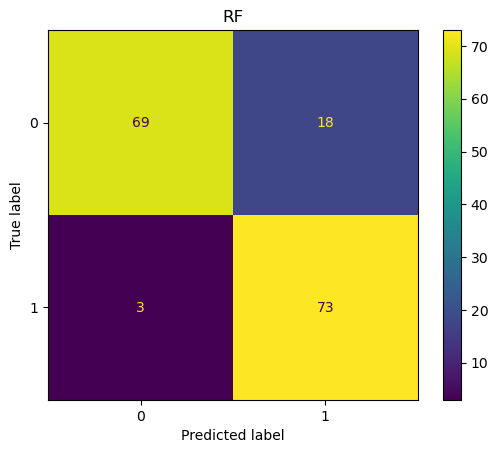

In [82]:
# Creating the confusion matrics for all classifiers' predictions

# Importing the necessary libraries for visualization and creating the confusion metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating the confusion metrics for Random Forest
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("RF")

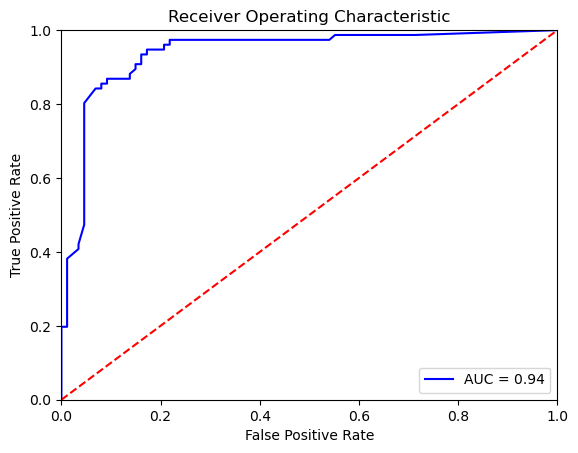

In [83]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Visualizing the AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


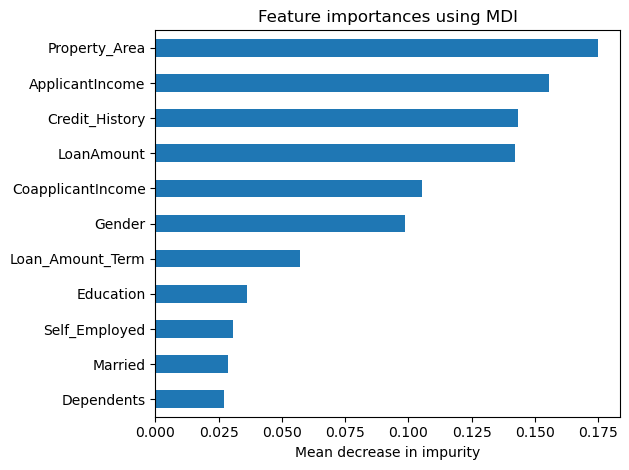

In [84]:
X = pd.DataFrame(X, columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
feature_names = X.columns
RF = RandomForestClassifier(max_depth= 15, max_features= 'auto', min_samples_split= 2, n_estimators= 100, random_state=42)
RF.fit(X_train, y_train)
importances = RF.feature_importances_

RF_importances = pd.Series(importances, index=feature_names).sort_values()

fig, ax = plt.subplots()
RF_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

The first four important features that affect the outcome of loan status are Property_Area, ApplicantIncone, Credit_History, and LoanAmount. An applicant with a high chance of granted loan status has a property or properties in an urban area, applies for a sensible amount, and has a track record of taking loans and repaying on schedule.